# paper: FRB 220319aaeb (SNR42, nearby)|

In [41]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4,model_free, power_law # pulse_fn_vec  
from burstfit.utils.plotter import plot_fit_results, plot_2d_fit 
from burstfit.io import BurstIO
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
# use Liam's function to read in filterbank files 
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

#from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec 
%matplotlib inline 


# input variables 
candidate = '220319aaeb'
datestring = '2022_2_6_19_34_4'
beam = 172
corr = 'corr09'
dm_heimdall = 111
width_heimdall = 1 
snr_heimdall = 41.7
mask_chans=[] 

#fil_file ='/data/dsa110/T1/'+corr + '/' + datestring + '/fil_'+candidate+'/'+candidate+'_'+str(beam)+'.fil'
fil_file = '/home/ubuntu/vikram/scratch/220319aaeb.fil'
save_name = candidate + '_beam_'+str(beam)
save_dir = '/home/ubuntu/gechen/burstfit_tests_outputs/' 


#data = ff.proc_cand_fil(fil_file, dm, width, nfreq_plot=64, ndm=64)[0]
#data_t = data.mean(0)

logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)
# create burst object 
bd = BurstData(
    fp=fil_file,
    dm=dm_heimdall ,
    tcand=0.5, # pulse starting time in s.
    width=width_heimdall,  
    snr=snr_heimdall
)

bd.prepare_data()

# number of channels after binning 
# requires each channel bin to have SNR_min 
# snr_heimdall was calculated with all 256 channels binned into one 
SNR_min = 5 # check?  
n_per_bin = int(256. / (1.0*snr_heimdall / SNR_min)**2) 
if n_per_bin <= 1:
    n_per_bin = 1
elif not math.log(n_per_bin, 2).is_integer():
    n_per_bin = 2 ** (int(np.log2(n_per_bin))+1)
    
nfreq = int(256 / n_per_bin) 
print(nfreq)
#nfreq = 4

2022-05-17 19:54:11,443 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-05-17 19:54:12,061 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-05-17 19:54:12,064 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-05-17 19:54:12,067 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


64


## de-disperse data (or read from file) and chop near the burst time

In [ ]:
# save the de-dispersed data to file (de-dispersion takes long time)
nfreq = 4

data = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=nfreq, ndm=64)[0]
np.save('220319aaeb_%d.txt'%nfreq, data, allow_pickle=False)


In [27]:
# chop near the burst region and plot 
i_low = int(0.508/bd.tsamp - 50*bd.width)
i_high = int(0.508/bd.tsamp + 50*bd.width)

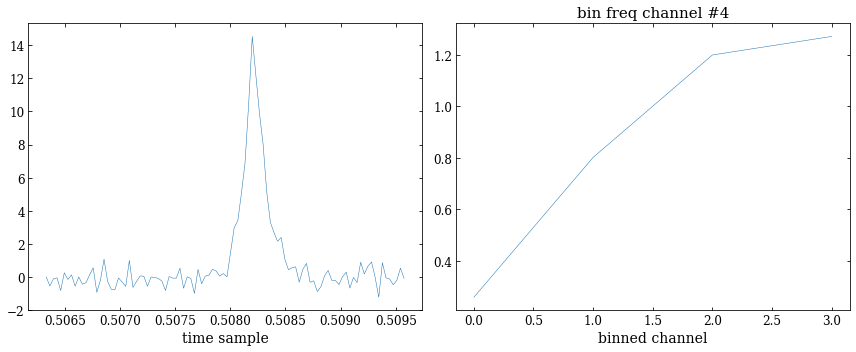

In [28]:
# read in de-dispersed data file
nfreq = 4

data = np.load('220319aaeb_%d.txt.npy'%nfreq)

# chop near the burst region and plot 
data_burst = data[:, i_low: i_high] # change to x * width 
t_burst = [i * bd.tsamp for i in range(i_low, i_high)]

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5)) 
#fig1.set_size_inches(12., 5.)
ax1[0].plot(t_burst, data_burst.mean(0))
ax1[0].set_xlabel('time sample')
ax1[1].plot(data_burst.mean(1))
ax1[1].set_xlabel('binned channel')
ax1[1].set_title('bin freq channel #%d'%nfreq)
plt.tight_layout()

In [5]:
# # read in de-dispersed data file
# nfreq = 8

# data = np.load('220319aaeb_%d.txt.npy'%nfreq)

# # chop near the burst region and plot 
# data_burst = data[:, i_low: i_high] # change to x * width 
# t_burst = [i * bd.tsamp for i in range(i_low, i_high)]

# fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5)) 
# #fig1.set_size_inches(12., 5.)
# ax1[0].plot(t_burst, data_burst.mean(0))
# ax1[0].set_xlabel('time sample')
# ax1[1].plot(data_burst.mean(1))
# ax1[1].set_xlabel('binned channel')
# ax1[1].set_title('bin freq channel #%d'%nfreq)
# plt.tight_layout()

## Fit with models

### bf_S1T2_cx: model-free spectrum + gaussian with scattering profile + x components

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c0', 'c1', 'c2', 'c3']


2022-05-17 00:06:11,370 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-17 00:06:11,372 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-17 00:06:11,378 - tests -root - INFO - P values: T-test (0.18051), Kruskal (0.14148), KS (0.28267), F-test (0.15210)
2022-05-17 00:06:11,379 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-05-17 00:06:11,385 - tests -root - INFO - P values: T-test (0.35209), Kruskal (0.24800), KS (0.28267), F-test (0.08019)
2022-05-17 00:06:11,388 - run_tests -burstfit.fit - INFO - On pulse residual is similar to left off pulse region.
2022-05-17 00:06:11,390 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-05-17 00:06:11,394 - tests -root - INFO - P values: T-test (0.79841), Kruskal (0.59951), KS (0.66014), F-test (0.34593)
2022-05-17 00:06:11,396 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-0

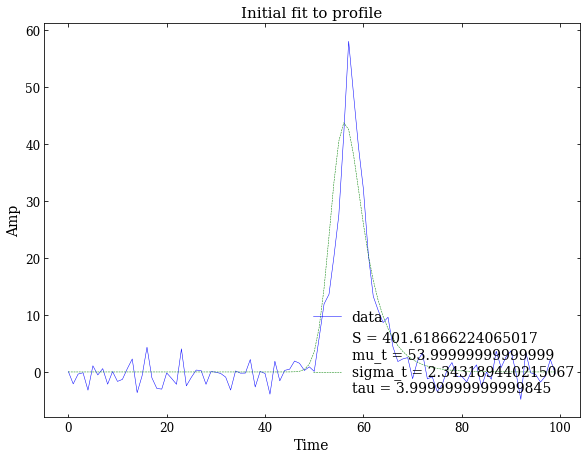

2022-05-17 00:06:11,615 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-05-17 00:06:11,618 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7ff5bcaea400>
[0.08549967 0.27269894 0.43279794 0.50350654]


2022-05-17 00:06:11,625 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-05-17 00:06:11,627 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08549966663122177 +- 0.0
2022-05-17 00:06:11,628 - initial_spectrafit -burstfit.fit - INFO - c1: 0.27269893884658813 +- 0.0
2022-05-17 00:06:11,630 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43279793858528137 +- 0.0
2022-05-17 00:06:11,636 - initial_spectrafit -burstfit.fit - INFO - c3: 0.5035065412521362 +- 0.0


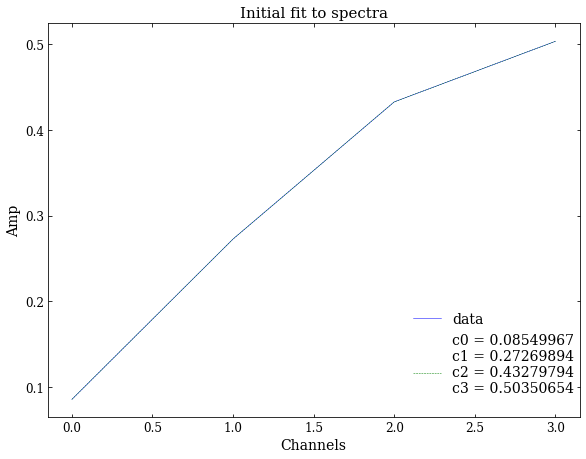

2022-05-17 00:06:11,804 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-05-17 00:06:11,807 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08549967, 0.27269894, 0.43279794, 0.50350654, 401.61866224065017, 53.99999999999999, 2.343189440215067, 3.9999999999999845, 111]
2022-05-17 00:06:11,861 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-05-17 00:06:11,864 - sgram_fit -burstfit.fit - INFO - c0: 0.068123099727052 +- 0.009638473438129985
2022-05-17 00:06:11,866 - sgram_fit -burstfit.fit - INFO - c1: 0.19563729671232807 +- 0.010610589515457564
2022-05-17 00:06:11,869 - sgram_fit -burstfit.fit - INFO - c2: 0.31731747195323906 +- 0.014161766660702865
2022-05-17 00:06:11,872 - sgram_fit -burstfit.fit - INFO - c3: 0.35501539785443487 +- 0.010822660226403583
2022-05-17 00:06:11,874 - sgram_fit -burstfit.fit - INFO - S: 430.3242430925282 +- 5.842165362127981
2022-05-17 00:06:11,877 - sgram_fit -burstfit.fit - INFO - mu_

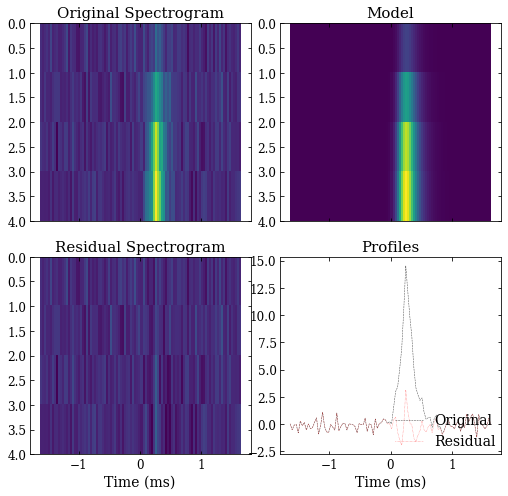

2022-05-17 00:06:12,290 - model -burstfit.fit - INFO - Making model.
2022-05-17 00:06:12,293 - model -burstfit.fit - INFO - Found 1 components.
2022-05-17 00:06:12,296 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-05-17 00:06:12,299 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-05-17 00:06:12,301 - model -burstfit.fit - INFO - Making model.
2022-05-17 00:06:12,303 - model -burstfit.fit - INFO - Found 1 components.
2022-05-17 00:06:12,306 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.4928540684598297
2022-05-17 00:06:12,307 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-17 00:06:12,309 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-17 00:06:12,313 - tests -root - INFO - P values: T-test (0.18051), Kruskal (0.14148), KS (0.28267), F-test (0.15210)
2022-05-17 00:06:12,314 - run

bf_S1T2_c1.calc_redchisq()= 1.4928540684598297


{1: {'popt': [0.068123099727052,
   0.19563729671232807,
   0.31731747195323906,
   0.35501539785443487,
   430.3242430925282,
   55.25466347613077,
   2.4286027470304177,
   3.3067363694419685,
   110.82903390860456],
  'perr': array([0.00963847, 0.01061059, 0.01416177, 0.01082266, 5.84216536,
         0.2704066 , 0.0692086 , 0.06261559, 0.18797961])},
 'all': {1: {'popt': [0.068123099727052,
    0.19563729671232807,
    0.31731747195323906,
    0.35501539785443487,
    430.3242430925282,
    55.25466347613077,
    2.4286027470304177,
    3.3067363694419685,
    110.82903390860456],
   'perr': array([0.00963847, 0.01061059, 0.01416177, 0.01082266, 5.84216536,
          0.2704066 , 0.0692086 , 0.06261559, 0.18797961])}}}

In [15]:
# bf_S1T2_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
#pnames = ['S', 'mu_t', 'sigma_t']
#pulseModel = Model(pulse_fn_vec, param_names=pnames)
pulseModel = Model(pulse_fn, param_names=pnames)
#pulseModel = Model(gauss, param_names=pnames)
#profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0),(np.inf, 0.55, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c1 for later model selection 
bf_S1T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c1.validate()
bf_S1T2_c1.precalc()


# fit tests
#bf_S1T2_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c1.initial_spectrafit(plot = True)

#bf_S1T2_c1.fitcycle(plot=True) # fit for one component.
bf_S1T2_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T2_c1.calc_redchisq()=', bf_S1T2_c1.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]

bf_S1T2_c1.sgram_params

2022-04-17 21:40:09,489 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-04-17 21:40:09,491 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [7.35844870e-02 2.16362401e-01 3.52212594e-01 3.88083702e-01
 3.97223134e+02 1.05244383e+02 2.33085312e+00 3.65729884e+00
 1.10750507e+02]
2022-04-17 21:40:09,504 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-04-17 21:40:09,506 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-04-17 21:40:09,508 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-04-17 21:40:09,510 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(6.583137904899579) + max_sigma_t_prior(4.195535616953822))
2022-04-17 21:40:09,512 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior 

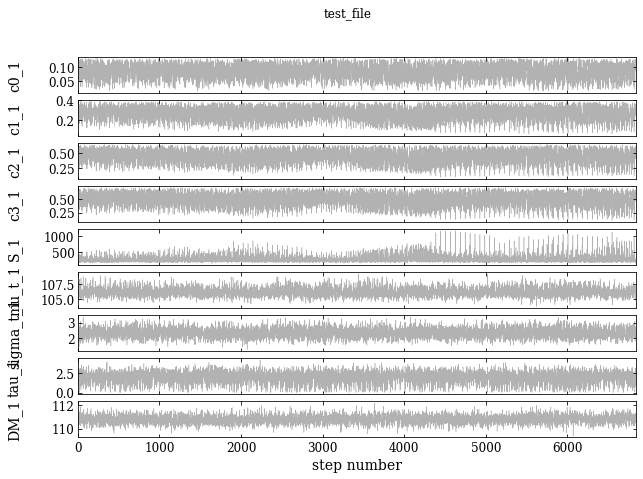

<Figure size 432x288 with 0 Axes>

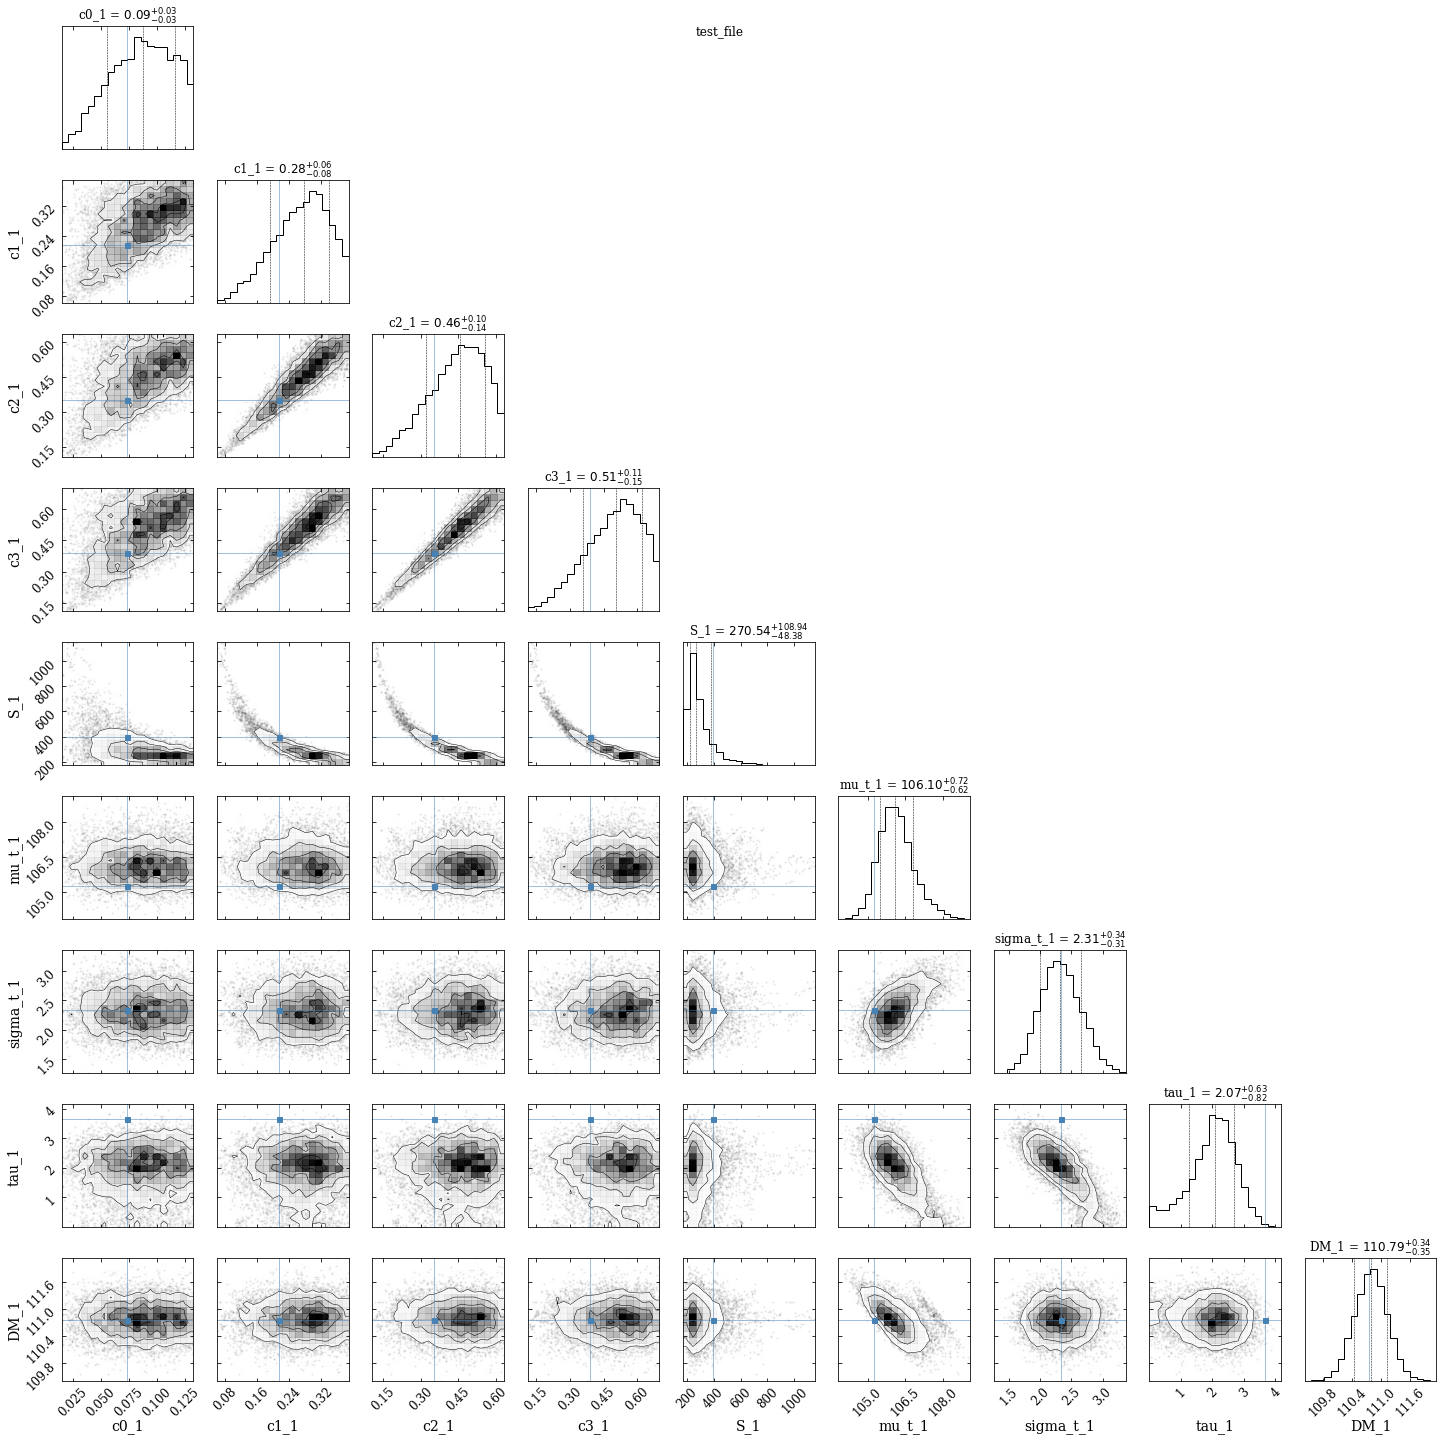

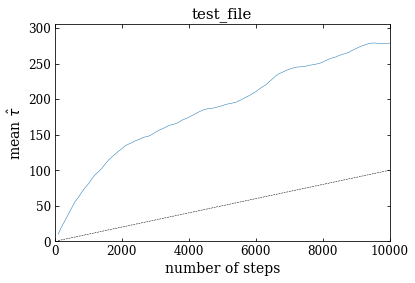

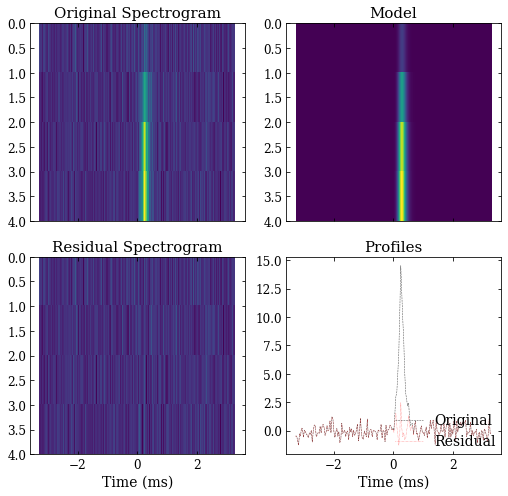

In [7]:
mcmc_kwargs = {}
mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
           'skip':500, 'ncores':4, 
           'start_pos_dev':0.01,
           'prior_range':0.8, 
           'save_results':True,
           'outname':'test_file'}

bf_S1T2_c1.run_mcmc(plot=True, **mcmc_kwargs)


In [8]:
n_param_overlap = 0 
n_model_param = bf_S1T2_c1.comp_num * len(bf_S1T2_c1.param_names) - n_param_overlap 
n_data = np.shape(data_burst)[0] * np.shape(data_burst)[1] 
model_param = []
for i in range(1, bf_S1T2_c1.comp_num + 1):
  model_param += bf_S1T2_c1.sgram_params['all'][i]['popt'] 

lnL = bf_S1T2_c1.mcmc.lnlk(model_param)

bf_S1T2_c1.BIC(lnL, n_model_param, n_data)
print('bf_S1T2_c1.bic = ', bf_S1T2_c1.bic) 

bf_S1T2_c1.bic =  225.67591937269117


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-25 00:14:24,798 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 00:14:24,800 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 00:14:24,804 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-25 00:14:24,806 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-04-25 00:14:24,810 - tests -root - INFO - P values: T-test (0.22007), Kruskal (0.24800), KS (0.28267), F-test (0.50978)
2022-04-25 00:14:24,812 - run_tests -burstfit.fit - INFO - On pulse residual is similar to left off pulse region.
2022-04-25 00:14:24,814 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-04-25 00:14:24,818 - tests -root - INFO - P values: T-test (0.38065), Kruskal (0.46225), KS (0.66014), F-test (0.32364)
2022-04-25 00:14:24,820 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-0

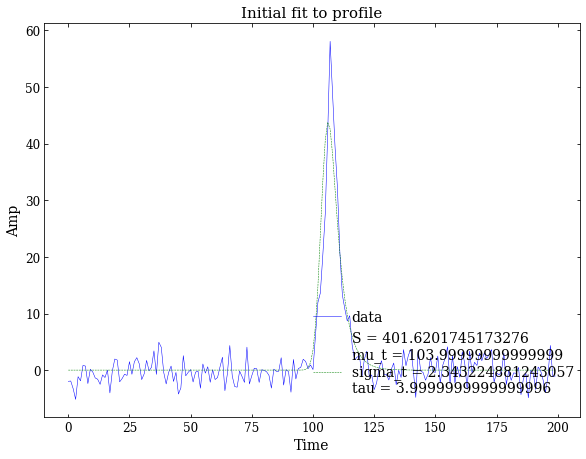

2022-04-25 00:14:25,055 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-25 00:14:25,056 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f514d1df6a8>
[0.08549967 0.27269894 0.43279794 0.50350654]


2022-04-25 00:14:25,060 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-25 00:14:25,061 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08549966663122177 +- 0.0
2022-04-25 00:14:25,062 - initial_spectrafit -burstfit.fit - INFO - c1: 0.27269893884658813 +- 0.0
2022-04-25 00:14:25,064 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43279793858528137 +- 0.0
2022-04-25 00:14:25,065 - initial_spectrafit -burstfit.fit - INFO - c3: 0.5035065412521362 +- 0.0


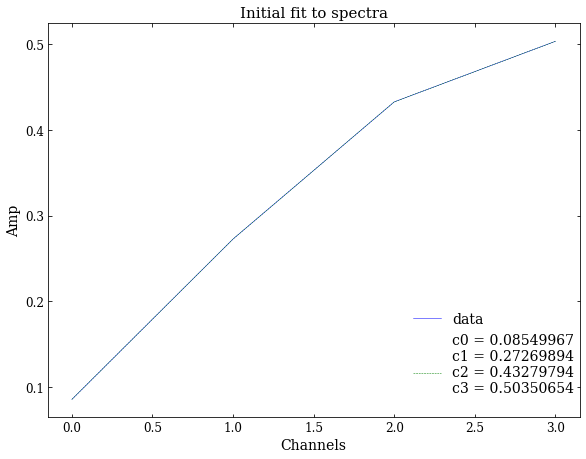

2022-04-25 00:14:25,197 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-25 00:14:25,198 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08549967, 0.27269894, 0.43279794, 0.50350654, 401.6201745173276, 103.99999999999999, 2.343224881243057, 3.9999999999999996, 111]
2022-04-25 00:14:25,276 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-25 00:14:25,278 - sgram_fit -burstfit.fit - INFO - c0: 0.07358448702045861 +- 0.00995714840492503
2022-04-25 00:14:25,279 - sgram_fit -burstfit.fit - INFO - c1: 0.21636240139585786 +- 0.01133612365999723
2022-04-25 00:14:25,281 - sgram_fit -burstfit.fit - INFO - c2: 0.3522125938066658 +- 0.010209971294568654
2022-04-25 00:14:25,282 - sgram_fit -burstfit.fit - INFO - c3: 0.3880837024706105 +- 0.012354598209203276
2022-04-25 00:14:25,284 - sgram_fit -burstfit.fit - INFO - S: 397.2231342812425 +- 7.319850056360699
2022-04-25 00:14:25,286 - sgram_fit -burstfit.fit - INFO - mu_t:

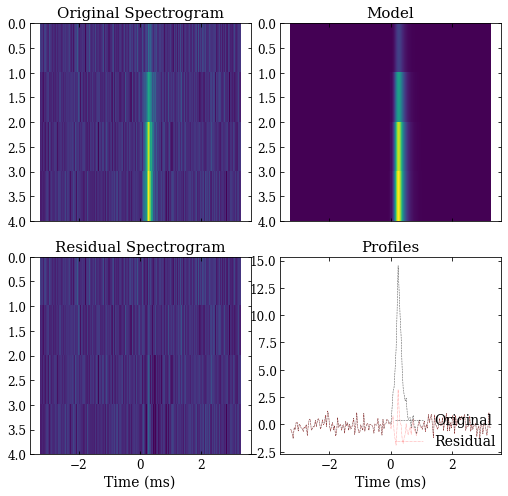

2022-04-25 00:14:25,671 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:25,673 - model -burstfit.fit - INFO - Found 1 components.
2022-04-25 00:14:25,675 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 00:14:25,677 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-25 00:14:25,678 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:25,680 - model -burstfit.fit - INFO - Found 1 components.
2022-04-25 00:14:25,682 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2647856592813111
2022-04-25 00:14:25,684 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 00:14:25,686 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 00:14:25,689 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-25 00:14:25,691 - run

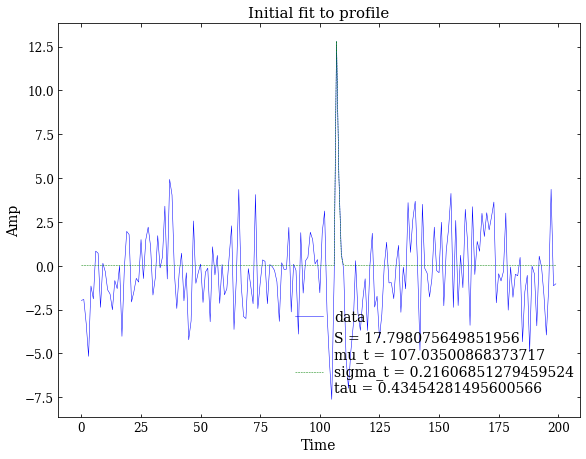

2022-04-25 00:14:25,893 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-25 00:14:25,897 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_4 at 0x7f514d1df6a8>
[0.025845908068519507 0.20867998685031483 0.49934655116315246
 0.5581010159045463]


2022-04-25 00:14:25,904 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-25 00:14:25,907 - initial_spectrafit -burstfit.fit - INFO - c0: 0.025845908068519507 +- 0.0
2022-04-25 00:14:25,910 - initial_spectrafit -burstfit.fit - INFO - c1: 0.20867998685031483 +- 0.0
2022-04-25 00:14:25,912 - initial_spectrafit -burstfit.fit - INFO - c2: 0.49934655116315246 +- 0.0
2022-04-25 00:14:25,915 - initial_spectrafit -burstfit.fit - INFO - c3: 0.5581010159045463 +- 0.0


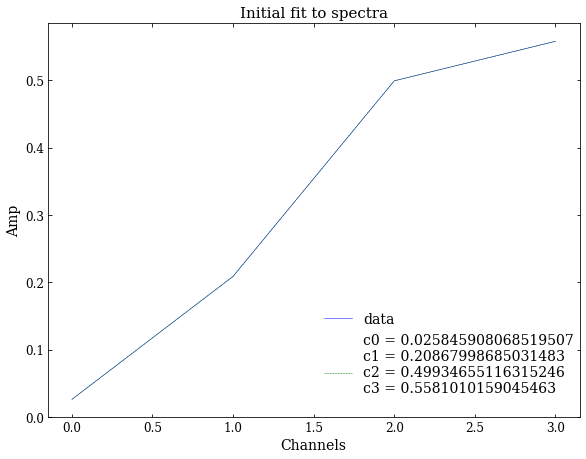

2022-04-25 00:14:26,069 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-04-25 00:14:26,072 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.025845908068519507, 0.20867998685031483, 0.49934655116315246, 0.5581010159045463, 17.798075649851956, 107.03500868373717, 0.21606851279459524, 0.43454281495600566, 111]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py:167: RuntimeWarning: overflow encountered in exp
  B = np.exp((1 / 2) * (sigma / tau) ** 2)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py:172: RuntimeWarning: overflow encountered in exp
  pulse[scat_idx] = A * B * np.exp(ln_C) * D
2022-04-25 00:14:26,094 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-25 00:14:26,096 - sgram_fit -burstfit.fit - INFO - c0: 0.025845908068519507 +- 0.07778164004146049
2022-04-25 00:14:26,098 - sg

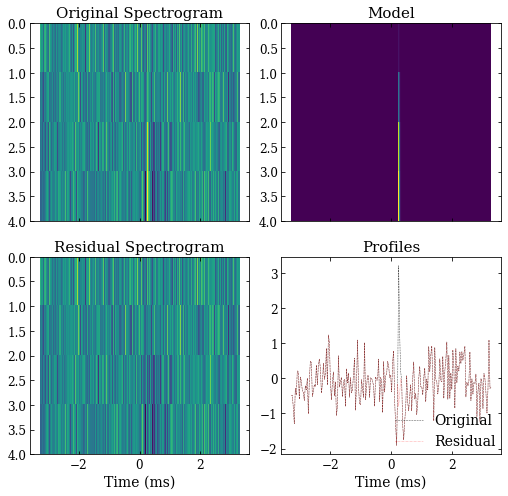

2022-04-25 00:14:26,443 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:26,446 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 00:14:26,450 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 00:14:26,452 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-25 00:14:26,455 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:26,458 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 00:14:26,463 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.22544679908804
2022-04-25 00:14:26,466 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 00:14:26,467 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 00:14:26,471 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-25 00:14:26,473 - run_t

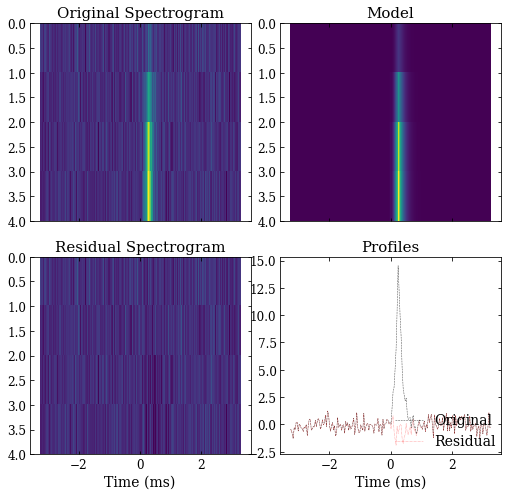

2022-04-25 00:14:27,088 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:27,091 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 00:14:27,095 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-25 00:14:27,097 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-04-25 00:14:27,099 - model -burstfit.fit - INFO - Making model.
2022-04-25 00:14:27,101 - model -burstfit.fit - INFO - Found 2 components.
2022-04-25 00:14:27,104 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.22544679908804
2022-04-25 00:14:27,105 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-25 00:14:27,107 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-25 00:14:27,109 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-25 00:14:

{1: {'popt': [0.07358448702045861,
   0.21636240139585786,
   0.3522125938066658,
   0.3880837024706105,
   397.2231342812425,
   105.24438319752008,
   2.330853120529901,
   3.657298836055322,
   110.7505068099203],
  'perr': array([0.00995715, 0.01133612, 0.01020997, 0.0123546 , 7.31985006,
         0.2582114 , 0.0538945 , 0.07220135, 0.17968103])},
 2: {'popt': [0.025845908068519507,
   0.20867998685031483,
   0.49934655116315246,
   0.5581010159045463,
   17.798075649851956,
   107.03500868373717,
   0.21606851279459524,
   0.43454281495600566,
   111.0],
  'perr': array([ 0.07778164,  0.09917508,  0.13748319,  0.30434993,  2.39998826,
          0.13670722, 35.06666485,  0.26461974,  0.254777  ])},
 'all': {1: {'popt': [0.07358448702045861,
    0.21636240139585786,
    0.3522125938066658,
    0.3880837024706105,
    397.2231342812425,
    105.24438319752008,
    2.330853120529901,
    3.657298836055322,
    110.7505068099203],
   'perr': array([1.20178387e-02, 1.35591738e-02, 1.383

In [7]:
# bf_S1T2_c2: two components
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
ncomp = 2 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c2 for later model selection 
bf_S1T2_c2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c2.validate()
bf_S1T2_c2.precalc()


# fit tests
#bf_S1T2_c2.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c2.initial_spectrafit(plot = True)

#bf_S1T2_c2.fitcycle(plot=True) # fit for one component.
bf_S1T2_c2.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
bf_S1T2_c2.calc_redchisq()

# plot fit for all components 
# plot_fit_results(bf_S1T2_c2.sgram, bf_S1T2_c2.sgram_model.evaluate, bf_S1T2_c2.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c2.tsamp, bf_S1T2_c2.fch1, bf_S1T2_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c2.sgram_params['all'][1]['popt'][-1], bf_S1T2_c2.sgram_params['all'][1]['perr'][-1]

bf_S1T2_c2.sgram_params

In [9]:
mcmc_kwargs = {}
mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
           'skip':500, 'ncores':4, 
           'start_pos_dev':0.01,
           'prior_range':0.8, 
           'save_results':True,
           'outname':'test_file'}

bf_S1T2_c2.run_mcmc(plot=True, **mcmc_kwargs)


2022-04-25 00:14:51,779 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-04-25 00:14:51,785 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [7.35844870e-02 2.16362401e-01 3.52212594e-01 3.88083702e-01
 3.97223134e+02 1.05244383e+02 2.33085312e+00 3.65729884e+00
 1.10750507e+02 2.58459081e-02 2.08679987e-01 4.99346551e-01
 5.58101016e-01 1.77980756e+01 1.07035009e+02 2.16068513e-01
 4.34542815e-01 1.11000000e+02]
2022-04-25 00:14:51,796 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-04-25 00:14:51,798 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-04-25 00:14:51,801 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-04-25 00:14:51,803 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(6.583137904899579) + max_sigma_t_prior(4.195535616

emcee: Exception while calling your likelihood function:emcee: Exception while calling your likelihood function:

Process ForkPoolWorker-3:





  params:  params:  [3.88939202e-02 2.41500203e-01 3.99298044e-01 4.66512207e-01
 3.08319159e+02 1.05726409e+02 2.46200602e+00 1.60338404e+00
 1.11274725e+02 4.56972789e-02 2.39358972e-01 3.19199689e-01
 5.85612780e-01 5.46676049e+00 1.69296109e+02 2.63646113e-01
 8.97624993e-01 6.60634045e+01][5.23170214e-02 1.71903129e-01 2.67492677e-01 2.75164223e-01
 4.37731357e+02 1.06504622e+02 1.92101987e+00 1.94021359e+00
 1.10663687e+02 1.62807745e-02 7.89714875e-02 2.32658189e-01
 6.31609151e-01 2.18226661e+01 1.12194334e+02 1.57069814e-01
 5.19084638e-01 1.05952150e+02]



KeyboardInterrupt: 

  args:  args:  [][]

  kwargs:  kwargs:  {}{}

  exception:


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


  exception:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 130, in lnprob
    return lp + self.lnlk(inps=params)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 143, in lnlk
    model = self.model_function([0], *inps)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/fit.py", line 896, in model_from_params
    model += self.sgram_model.evaluate([0], *popt)
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/ubuntu/

emcee: Exception while calling your likelihood function:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/fit.py", line 896, in model_from_params
    model += self.sgram_model.evaluate([0], *popt)
  File "<__array_function__ internals>", line 6, in result_type
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/model.py", line 162, in evaluate
    other_params,
KeyboardInterrupt


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py", line 257, in sgram_fn
    p = pulse_function(times, **p_params)
Process ForkPoolWorker-2:


  params:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py", line 172, in pulse_fn_vec
    pulse[scat_idx] = A * B * np.exp(ln_C) * D


KeyboardInterrupt
Traceback (most recent call last):
Process ForkPoolWorker-4:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()


[7.78871215e-02 1.97011348e-01 3.40731402e-01 3.54016163e-01
 3.54360085e+02 1.06786369e+02 2.12597000e+00 1.70795369e+00
 1.10790760e+02 2.86173111e-02 1.89540841e-01 4.96483059e-01
 3.11934972e-01 2.27858318e+01 1.28586338e+02 1.42661992e-01
 6.76163795e-01 1.12242875e+02]

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))


  args:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)


[]

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 130, in lnprob
    return lp + self.lnlk(inps=params)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)


  kwargs:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 143, in lnlk
    model = self.model_function([0], *inps)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 130, in lnprob
    return lp + self.lnlk(inps=params)


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/fit.py", line 896, in model_from_params
    model += self.sgram_model.evaluate([0], *popt)


{}

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/mcmc.py", line 143, in lnlk
    model = self.model_function([0], *inps)


  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/model.py", line 162, in evaluate
    other_params,
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/fit.py", line 896, in model_from_params
    model += self.sgram_model.evaluate([0], *popt)


  exception:

  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py", line 245, in sgram_fn
    freqs = fstart + foff * np.linspace(0, nf - 1, nf)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/model.py", line 162, in evaluate
    other_params,


  File "<__array_function__ internals>", line 6, in linspace
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/numpy/core/function_base.py", line 123, in linspace
    dt = result_type(start, stop, float(num))
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py", line 257, in sgram_fn
    p = pulse_function(times, **p_params)
  File "<__array_function__ internals>", line 6, in result_type
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/functions.py", line 172, in pulse_fn_vec
    pulse[scat_idx] = A * B * np.exp(ln_C) * D
KeyboardInterrupt
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/emcee/ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg

In [8]:
n_param_overlap = 0 
n_model_param = bf_S1T2_c2.comp_num * len(bf_S1T2_c2.param_names) - n_param_overlap 
n_data = np.shape(data_burst)[0] * np.shape(data_burst)[1] 
model_param = []
for i in range(1, bf_S1T2_c2.comp_num + 1):
  model_param += bf_S1T2_c2.sgram_params['all'][i]['popt'] 

lnL = bf_S1T2_c2.mcmc.lnlk(model_param)

bf_S1T2_c2.BIC(lnL, n_model_param, n_data)
print('bf_S1T2_c2.bic = ', bf_S1T2_c2.bic) 

AttributeError: 'NoneType' object has no attribute 'lnlk'

### bf_S1T1_cx: model-free spectrum + gaussian profile NO scattering + x-component 

self.function_input_names:  ['S', 'mu', 'sigma']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c0', 'c1', 'c2', 'c3']


2022-05-17 00:12:57,242 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-05-17 00:12:57,245 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-05-17 00:12:57,258 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-05-17 00:12:57,260 - initial_profilefit -burstfit.fit - INFO - S: 351.11780034343604 +- 9.768018730464474
2022-05-17 00:12:57,262 - initial_profilefit -burstfit.fit - INFO - mu_t: 57.52700623189911 +- 0.09143216627680778
2022-05-17 00:12:57,265 - initial_profilefit -burstfit.fit - INFO - sigma_t: 2.846269428416982 +- 0.09143216794812181


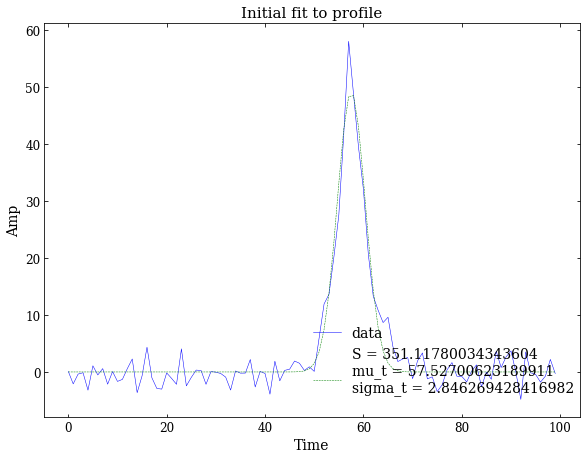

2022-05-17 00:12:57,446 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-05-17 00:12:57,449 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7ff5bcaea400>
[0.09705494 0.26526412 0.44478154 0.48285386]


2022-05-17 00:12:57,456 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-05-17 00:12:57,457 - initial_spectrafit -burstfit.fit - INFO - c0: 0.09705493599176407 +- 0.0
2022-05-17 00:12:57,459 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2652641236782074 +- 0.0
2022-05-17 00:12:57,461 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4447815418243408 +- 0.0
2022-05-17 00:12:57,463 - initial_spectrafit -burstfit.fit - INFO - c3: 0.48285385966300964 +- 0.0


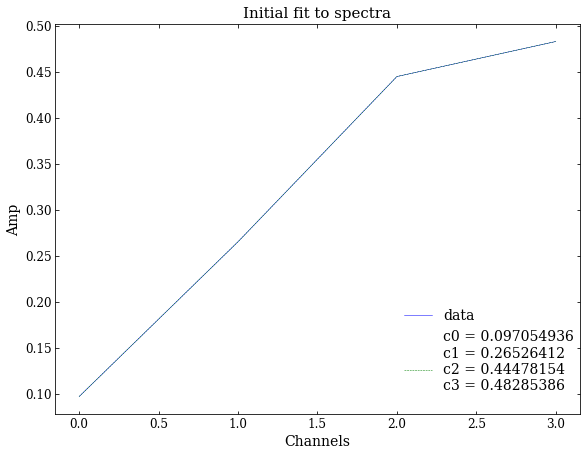

2022-05-17 00:12:57,645 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-05-17 00:12:57,648 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.097054936, 0.26526412, 0.44478154, 0.48285386, 351.11780034343604, 57.52700623189911, 2.846269428416982, 111]
2022-05-17 00:12:57,698 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-05-17 00:12:57,701 - sgram_fit -burstfit.fit - INFO - c0: 0.06086005109305386 +- 0.008390461533299438
2022-05-17 00:12:57,703 - sgram_fit -burstfit.fit - INFO - c1: 0.17498283670302525 +- 0.009227141886811325
2022-05-17 00:12:57,706 - sgram_fit -burstfit.fit - INFO - c2: 0.2868902774243371 +- 0.010578460621123458
2022-05-17 00:12:57,708 - sgram_fit -burstfit.fit - INFO - c3: 0.31825181884290754 +- 0.01089494486730017
2022-05-17 00:12:57,710 - sgram_fit -burstfit.fit - INFO - S: 413.41757803542407 +- 6.557223686599994
2022-05-17 00:12:57,712 - sgram_fit -burstfit.fit - INFO - mu_t: 57.915762052294

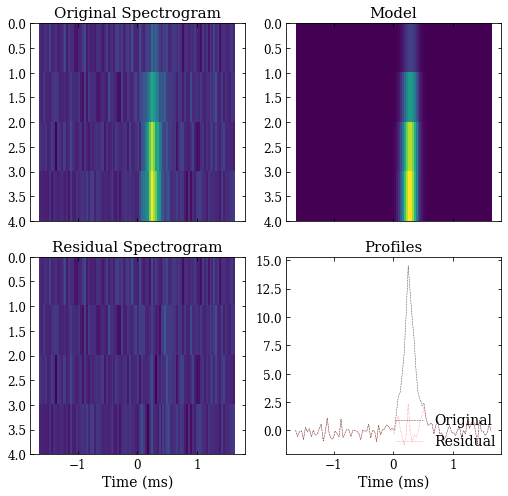

2022-05-17 00:12:58,116 - model -burstfit.fit - INFO - Making model.
2022-05-17 00:12:58,119 - model -burstfit.fit - INFO - Found 1 components.
2022-05-17 00:12:58,124 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-05-17 00:12:58,126 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-05-17 00:12:58,128 - model -burstfit.fit - INFO - Making model.
2022-05-17 00:12:58,130 - model -burstfit.fit - INFO - Found 1 components.
2022-05-17 00:12:58,133 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.3761991724457614
2022-05-17 00:12:58,135 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-17 00:12:58,137 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-17 00:12:58,141 - tests -root - INFO - P values: T-test (0.18051), Kruskal (0.14148), KS (0.28267), F-test (0.15210)
2022-05-17 00:12:58,143 - run

bf_S1T1_c1.calc_redchisq()= 1.3761991724457614


In [38]:
# bf_S1T1_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t'] # , 'tau'
pulseModel = Model(gauss, param_names=pnames)
#profile_bounds=[(0, 0.5 / bd.tsamp - i_low, 0),(np.inf, 0.52/ bd.tsamp - i_low, 5*bd.width)]
profile_bounds=[(0, 50, 0),(np.inf, 60, 5*bd.width)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf)) # did not work when only set up bounds but do not chop data 
#sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf))

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T1_c1 for later model selection 
bf_S1T1_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T1_c1.validate()
bf_S1T1_c1.precalc()


# fit tests
#bf_S1T1_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T1_c1.initial_spectrafit(plot = True)

bf_S1T1_c1.fitcycle(plot=True, profile_bounds = profile_bounds) # fit for one component.
bf_S1T1_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T1_c1.calc_redchisq()=', bf_S1T1_c1.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T1_c1.sgram, bf_S1T1_c1.sgram_model.evaluate, bf_S1T1_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T1_c1.tsamp, bf_S1T1_c1.fch1, bf_S1T1_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T1_c1.sgram_params['all'][1]['popt'][-1], bf_S1T1_c1.sgram_params['all'][1]['perr'][-1]

#bf_S1T1_c1.sgram_params

In [37]:
# bf_S1T1_c1.initial_profilefit(bounds = profile_bounds, plot = True)
# bf_S1T1_c1.initial_spectrafit(plot = True)
0.50 / bd.tsamp - i_low

-193.21093750000182

self.function_input_names:  ['S', 'mu', 'sigma']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-18 22:41:36,586 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-18 22:41:37,017 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-04-18 22:41:37,020 - initial_profilefit -burstfit.fit - INFO - S: 9.731155702437924 +- 5.611100827416538e-05
2022-04-18 22:41:37,023 - initial_profilefit -burstfit.fit - INFO - mu_t: 107.00068707488218 +- 8.410004071149072e-05
2022-04-18 22:41:37,025 - initial_profilefit -burstfit.fit - INFO - sigma_t: 0.06682853858439418 +- 0.00816967017840281


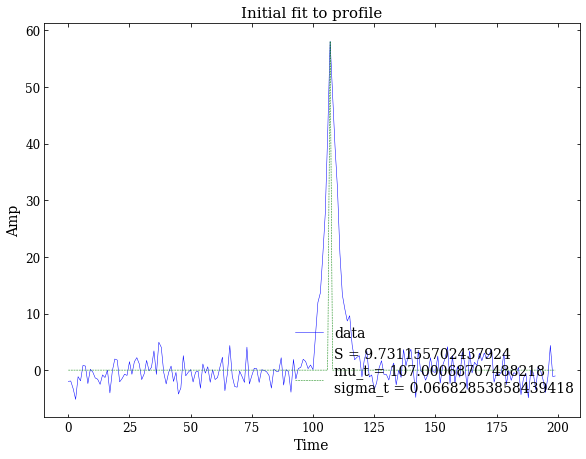

2022-04-18 22:41:37,193 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-04-18 22:41:37,196 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-18 22:41:37,570 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-04-18 22:41:37,573 - initial_profilefit -burstfit.fit - INFO - S: 9.731155702437924 +- 5.611100827416538e-05
2022-04-18 22:41:37,575 - initial_profilefit -burstfit.fit - INFO - mu_t: 107.00068707488218 +- 8.410004071149072e-05
2022-04-18 22:41:37,578 - initial_profilefit -burstfit.fit - INFO - sigma_t: 0.06682853858439418 +- 0.00816967017840281


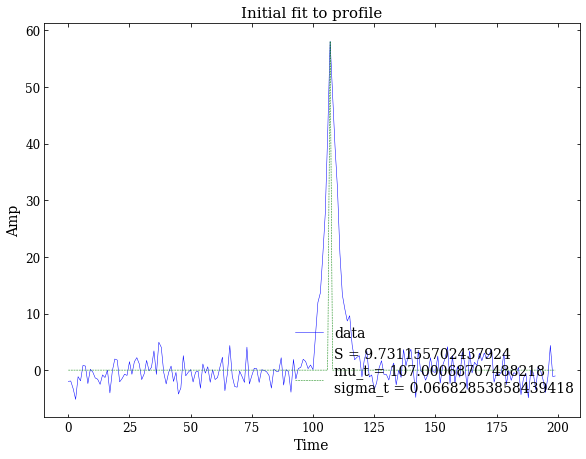

2022-04-18 22:41:37,728 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-18 22:41:37,731 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f811fa956a8>
[0.08597253 0.2655621  0.44683236 0.48923844]


2022-04-18 22:41:37,737 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-18 22:41:37,739 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08597253262996674 +- 0.0
2022-04-18 22:41:37,740 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2655620872974396 +- 0.0
2022-04-18 22:41:37,742 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4468323588371277 +- 0.0
2022-04-18 22:41:37,743 - initial_spectrafit -burstfit.fit - INFO - c3: 0.489238440990448 +- 0.0


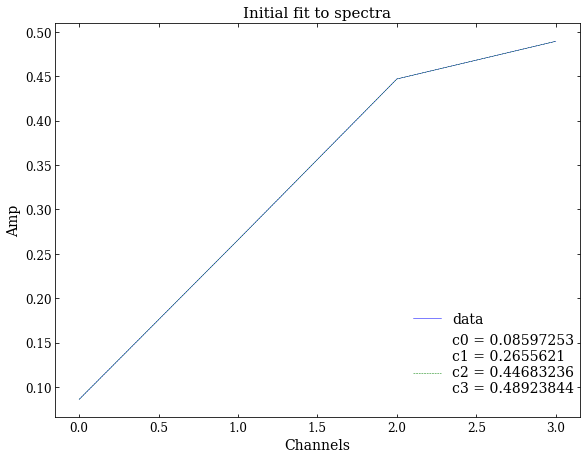

2022-04-18 22:41:37,890 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-18 22:41:37,893 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08597253, 0.2655621, 0.44683236, 0.48923844, 9.731155702437924, 107.00068707488218, 0.06682853858439418, 111]
2022-04-18 22:41:37,961 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-18 22:41:43,894 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-18 22:41:43,898 - sgram_fit -burstfit.fit - INFO - c0: 0.07774240319406699 +- 1859068.5047533498
2022-04-18 22:41:43,901 - sgram_fit -burstfit.fit - INFO - c1: 0.22247538955794316 +- 5320095.2479161965
2022-04-18 22:41:43,903 - sgram_fit -burstfit.fit - INFO - c2: 0.47429170851735136 +- 11341825.592219107
2022-04-18 22:41:43,906 - sgram_fit -burstfit.fit - INFO - c3: 0.5518949886623296 +- 13197567.212356474
2022-04-18 22:41:43,909 - sgram_fit -burstfit.fit - INFO - S: 9

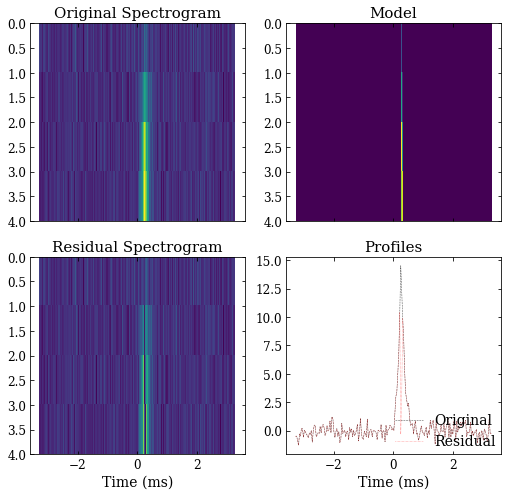

2022-04-18 22:41:44,255 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:44,257 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:41:44,260 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-18 22:41:44,263 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-18 22:41:44,266 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:44,269 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:41:44,273 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.8104170563698823
2022-04-18 22:41:44,275 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-18 22:41:44,277 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-18 22:41:44,282 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-18 22:41:44,284 - run

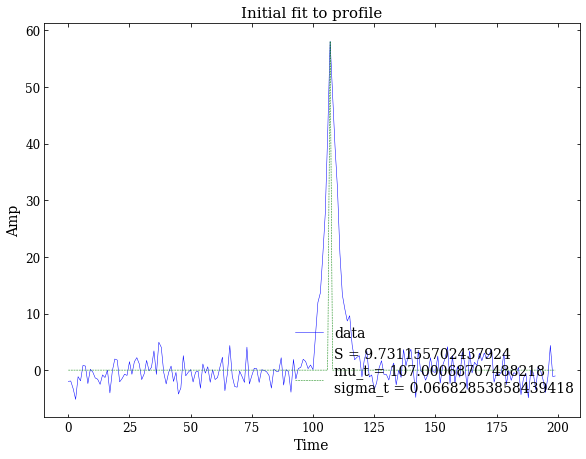

2022-04-18 22:41:44,913 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-18 22:41:44,916 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f811fa956a8>
[0.08597253 0.2655621  0.44683236 0.48923844]


2022-04-18 22:41:44,922 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-18 22:41:44,924 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08597253262996674 +- 0.0
2022-04-18 22:41:44,925 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2655620872974396 +- 0.0
2022-04-18 22:41:44,927 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4468323588371277 +- 0.0
2022-04-18 22:41:44,929 - initial_spectrafit -burstfit.fit - INFO - c3: 0.489238440990448 +- 0.0


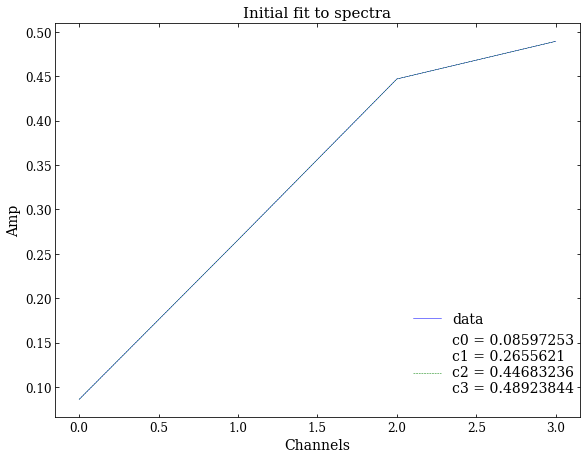

2022-04-18 22:41:45,082 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-18 22:41:45,085 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08597253, 0.2655621, 0.44683236, 0.48923844, 9.731155702437924, 107.00068707488218, 0.06682853858439418, 111]
2022-04-18 22:41:45,154 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-18 22:41:51,109 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-18 22:41:51,113 - sgram_fit -burstfit.fit - INFO - c0: 0.07774240319406699 +- 1859068.5047533498
2022-04-18 22:41:51,115 - sgram_fit -burstfit.fit - INFO - c1: 0.22247538955794316 +- 5320095.2479161965
2022-04-18 22:41:51,118 - sgram_fit -burstfit.fit - INFO - c2: 0.47429170851735136 +- 11341825.592219107
2022-04-18 22:41:51,121 - sgram_fit -burstfit.fit - INFO - c3: 0.5518949886623296 +- 13197567.212356474
2022-04-18 22:41:51,122 - sgram_fit -burstfit.fit - INFO - S: 9

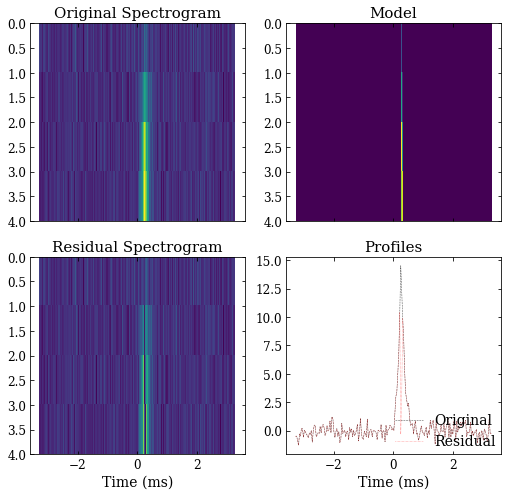

2022-04-18 22:41:51,486 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:51,489 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:41:51,492 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-18 22:41:51,494 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-18 22:41:51,496 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:51,498 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:41:51,501 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.8104170563698823
2022-04-18 22:41:51,503 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-18 22:41:51,504 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-18 22:41:51,508 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-18 22:41:51,510 - run

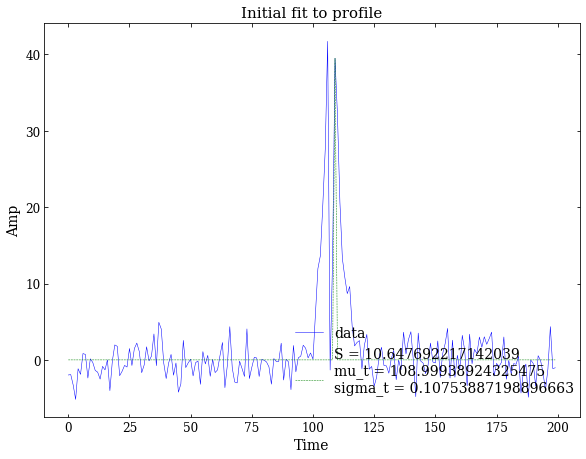

2022-04-18 22:41:51,905 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-18 22:41:51,909 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_4 at 0x7f811fa956a8>
[0.19439288127879176 0.36628787069426605 0.3363228751700058
 0.4003856269926645]


2022-04-18 22:41:51,916 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-18 22:41:51,918 - initial_spectrafit -burstfit.fit - INFO - c0: 0.19439288127879176 +- 0.0
2022-04-18 22:41:51,920 - initial_spectrafit -burstfit.fit - INFO - c1: 0.36628787069426605 +- 0.0
2022-04-18 22:41:51,921 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3363228751700058 +- 0.0
2022-04-18 22:41:51,923 - initial_spectrafit -burstfit.fit - INFO - c3: 0.4003856269926645 +- 0.0


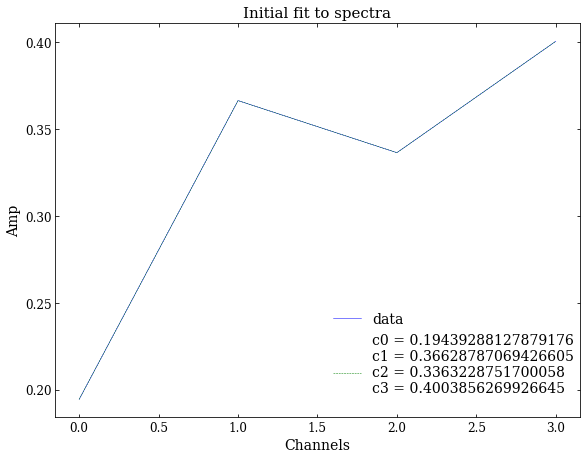

2022-04-18 22:41:52,232 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-04-18 22:41:52,235 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.19439288127879176, 0.36628787069426605, 0.3363228751700058, 0.4003856269926645, 10.647692217142039, 108.99938924325475, 0.10753887198896663, 111]
2022-04-18 22:41:52,292 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-18 22:41:54,510 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-18 22:41:54,513 - sgram_fit -burstfit.fit - INFO - c0: 0.15551430502303346 +- 11073504.509402739
2022-04-18 22:41:54,515 - sgram_fit -burstfit.fit - INFO - c1: 0.29303029655541646 +- 20865426.541945424
2022-04-18 22:41:54,518 - sgram_fit -burstfit.fit - INFO - c2: 0.4035874502011889 +- 28737725.75839372
2022-04-18 22:41:54,520 - sgram_fit -burstfit.fit - INFO - c3: 0.4804627523911519 +- 34211685.15699139
2022-04-18 22:41:54,522 - sgra

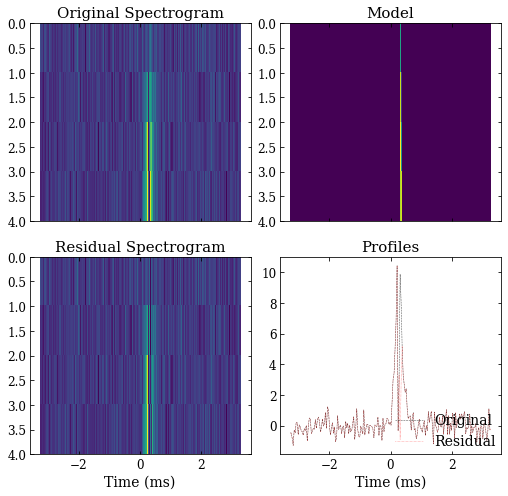

2022-04-18 22:41:54,856 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:54,859 - model -burstfit.fit - INFO - Found 2 components.
2022-04-18 22:41:54,862 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-18 22:41:54,864 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-18 22:41:54,867 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:54,869 - model -burstfit.fit - INFO - Found 2 components.
2022-04-18 22:41:54,873 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.4224996064383586
2022-04-18 22:41:54,874 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-18 22:41:54,876 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-18 22:41:54,880 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-18 22:41:54,882 - run

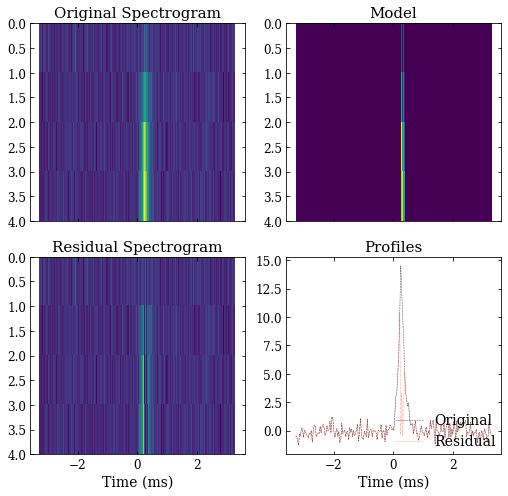

2022-04-18 22:41:56,155 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:56,157 - model -burstfit.fit - INFO - Found 2 components.
2022-04-18 22:41:56,161 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-18 22:41:56,163 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-04-18 22:41:56,165 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:41:56,167 - model -burstfit.fit - INFO - Found 2 components.
2022-04-18 22:41:56,171 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.4105119056550723
2022-04-18 22:41:56,172 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-18 22:41:56,174 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-18 22:41:56,177 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-18 22:4

bf_S1T1_c2.calc_redchisq()= 1.4105119056550723


In [13]:
# bf_S1T1_c2: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 2 

pnames = ['S', 'mu_t', 'sigma_t'] # , 'tau'
pulseModel = Model(gauss, param_names=pnames)
profile_bounds=[(0, 0, 0),(np.inf, np.shape(data_burst)[1], np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T1_c2 for later model selection 
bf_S1T1_c2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T1_c2.validate()
bf_S1T1_c2.precalc()


# fit tests
bf_S1T1_c2.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T1_c2.initial_spectrafit(plot = True)

bf_S1T1_c2.fitcycle(plot=True, profile_bounds = profile_bounds) # fit for one component.
bf_S1T1_c2.fitall(plot=True, max_ncomp = ncomp, profile_bounds = profile_bounds) # fit all componnts 
print('bf_S1T1_c2.calc_redchisq()=', bf_S1T1_c2.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T1_c2.sgram, bf_S1T1_c2.sgram_model.evaluate, bf_S1T1_c2.sgram_params['all'][1]['popt'], 
#                  bf_S1T1_c2.tsamp, bf_S1T1_c2.fch1, bf_S1T1_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T1_c2.sgram_params['all'][1]['popt'][-1], bf_S1T1_c2.sgram_params['all'][1]['perr'][-1]

#bf_S1T1_c2.sgram_params

In [14]:
# bf_S1T2_c2: model-free spectrum + gaussian with scattering profile (2 components) 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c2 for later model selection 
bf_S1T2_c2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    comp_num = 2, 
)


# Some setting up before we do the fitting 
bf_S1T2_c2.validate()
bf_S1T2_c2.precalc()


# fit 
#bf_S1T2_c2.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c2.initial_spectrafit(plot = True)

bf_S1T2_c2.fitcycle(plot = True)
# fit all componnts 
bf_S1T2_c2.fitall(plot = True, max_ncomp = bf_S1T2_c2.comp_num + 1) 
bf_S1T2_c2.calc_redchisq()
plot_fit_results(bf_S1T2_c2.sgram, bf_S1T2_c2.sgram_model.evaluate, bf_S1T2_c2.sgram_params['all'][1]['popt'], 
                 bf_S1T2_c2.tsamp, bf_S1T2_c2.fch1, bf_S1T2_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c2.sgram_params['all'][1]['popt'][-1], bf_S1T2_c2.sgram_params['all'][1]['perr'][-1]

bf_S1T2_c2.sgram_params

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


TypeError: __init__() got an unexpected keyword argument 'comp_num'

### bf_S2T2_cx: gaussian spectrum + gaussian with scattering profile + x-component 


In [ ]:
# bf_S2T2_c1: gauss spectrum + gaussian with scattering profile + single component 

# fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)


print(nfreq)


# For spectra, we will use a normalized gaussian model  
snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)



sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((0, 700, 0, -np.inf, 0, 0, 0),(np.inf, 800, 10, np.inf, nfreq, nfreq, 1000)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf for later model selection 
bf_S2T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False
)


# Some setting up before we do the fitting 
bf_S2T2_c1.validate()
bf_S2T2_c1.precalc()

bf_S2T2_c1.fitcycle(plot=True, profile_bounds=[],
        spectra_bounds=[],
        sgram_bounds=[-np.inf, np.inf])
# fit all componnts 
bf_S2T2_c1.fitall(plot=True) 
bf_S2T2_c1.calc_redchisq()
plot_fit_results(bf_S2T2_c1.sgram, bf_S2T2_c1.sgram_model.evaluate, bf_S2T2_c1.sgram_params['all'][1]['popt'], 
                 bf_S2T2_c1.tsamp, bf_S2T2_c1.fch1, bf_S2T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf.sgram_params['all'][1]['popt'][-1], bf.sgram_params['all'][1]['perr'][-1]

bf_S2T2_c1.sgram_params
# mcmc may find more components? 

### bf_S3T2: power law spectrum + gaussian with scattering profile + x-component 


In [ ]:
# bf_S3T2: power law spectrum + gauss with scattering profile  

# fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
profile_bounds=[(0, 450, 0, 0),(np.inf, 550, 10*bd.width, np.inf)]
pulseModel = Model(pulse_fn_vec, param_names=pnames)


print(nfreq)


# For spectra, we will use a power law 
snames = ['A', 'alpha_f'] 
spectra_bounds=((-np.inf, 0),(np.inf, np.inf))
spectraModel = Model(power_law, param_names=snames)



sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((0, 700, 0, -np.inf, -np.inf, -np.inf, 0),(np.inf, 800, 10, np.inf, -np.inf, np.inf, 1000)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S3T2 for later model selection 
bf_S3T2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False
)

# Some setting up before we do the fitting 
bf_S3T2.validate()
bf_S3T2.precalc()

bf_S3T2.initial_profilefit(plot = True)
bf_S3T2.initial_spectrafit(bounds = spectra_bounds, plot = True)

# bf_S3T2.fitcycle(plot=True)
# # fit all componnts 
# bf_S3T2.fitall(plot=True) 
# bf_S3T2.calc_redchisq()
# plot_fit_results(bf_S3T2.sgram, bf_S3T2.sgram_model.evaluate, bf_S3T2.sgram_params['all'][1]['popt'], 
#                  bf_S3T2.tsamp, bf_S3T2.fch1, bf_S3T2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
# #dm_fit, dm_fit_err = bf_S3T2.sgram_params['all'][1]['popt'][-1], bf_S3T2.sgram_params['all'][1]['perr'][-1]

# bf_S3T2.sgram_params

In [ ]:
# bounds_profile = ([0, 500, 0, 0], [np.inf, 510, 10, 10]) # ['S', 'mu_t', 'sigma_t', 'tau']
# p0 = [60, 750, 5, 5]
# bf_S1T2.initial_profilefit(bounds =bounds_profile, plot = True)

#model_free(np.array([0.1, 0.1, 0.2, 0.1]), snames)

## MCMC (will combine into fit later)

nwalker >= dimention + 1 

nstep until getting smooth parameter distributions 

In [ ]:
mcmc_kwargs = {}
mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
           'skip':500, 'ncores':4, 
           'start_pos_dev':0.01,
           'prior_range':0.8, 
           'save_results':True,
           'outname':'test_file'}

bf_S1T2.run_mcmc(plot=True, **mcmc_kwargs)

In [ ]:
# bf.sgram_params
# plot_me(bf.model[:,int(382/2-30): int(382/2+30)]) 
# bd.tsamp*3*1e3

# dm_diff = 103.46597098341815 - 103
# print('expected despersion in tsamp: %.1f time samples'%(4.149e3*dm_diff*(1/1280**2 - 1/1530**2) / bd.tsamp)) 

# plot_me(bf.model)

# bf.sgram_params

# sgramModel.nparams


In [ ]:
# save fitting results 
bd.prepare_data()
bio = BurstIO(bf, bd)
d = bio.save_results(outname=save_name+"_fit_results.json", outdir=save_dir)  
print(d['param_names'])

In [ ]:
# do not delete this cell. 
# fit again using the new DM result dm_fit
# data, datadm, tsdm0, dms, datadm0 = ff.proc_cand_fil(fil_file, dm_fit, bd.width, nfreq_plot=nfreq, ndm=32)
# data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)]
# bf.sgram = data_burst
# bf.dm = dm_fit
# bd.dm = dm_fit 

# plt.plot(range(len(data_burst.mean(0))), data_burst.mean(0))
# plt.xlabel('Time Sample using new DM')

# bf.fitall(plot=False)
# plot_fit_results(bf.sgram, bf.sgram_model.evaluate, bf.sgram_params['all'][1]['popt'], 
#                  bf.tsamp, bf.fch1, bf.foff, show=True, save=True, outname=save_name+'2d_fit_res'+'_dm_burstfit', outdir=save_dir)


In [12]:
# saving key burst paramters 
mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc = bf.mcmc_params[1]['popt']
mu_f_mcmc_err, sigma_f_mcmc_err, s_mcmc_err, mu_t_mcmc_err, sigma_t_mcmc_err, tau_mcmc_err, dm_mcmc_err = bf.mcmc_params[1]['perr']

t0 = 0.45 + mu_t_mcmc * bd.tsamp
t0_err = [i * bd.tsamp for i in mu_t_mcmc_err] 

width_ms = sigma_t_mcmc * bd.tsamp * 1e3 # in ms
width_ms_err = [i * bd.tsamp for i in sigma_t_mcmc_err] 

# with open(save_dir+save_name+"_fit_key_results.txt") as f:
#     print('mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc')
#     print(bf.mcmc_params[1]['popt'])
#     print('lower, upper bounds')
#     print(bf.mcmc_params[1]['perr'])

#outname=save_name+"_fit_results.json", outdir=save_dir

NameError: name 'bf' is not defined

In [ ]:
rms_res = np.sqrt(sum(bf.residual.mean(0)**2) / len(bf.residual.mean(0)))

rms_res = np.sqrt(sum(data.mean(0)**2) / len(data.mean(0)))

snr_mcmc = max(bf.model.mean(0)) / rms_res * np.sqrt(bf.width)

In [ ]:
data_mcmc_dm = ff.proc_cand_fil(fil_file, dm_mcmc, sigma_f_mcmc, nfreq_plot=nfreq, ndm=32)[0]

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(range(len(data.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])), data.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])
ax[0].set_title('Using heimdall DM: SNR=%d?'%bd.snr)

ax[1].plot(range(len(data_mcmc_dm.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])), data_mcmc_dm.mean(0)[int(0.48/bd.tsamp): int(0.52/bd.tsamp)])
ax[1].set_xlabel('Time Sample')
ax[1].set_title('Using burstfit DM: SNR=')
fig.savefig(save_name + 'burst.pdf')